### Import the packages

In [2]:
import json
import urllib.request
import datetime
import pandas as pd
import io
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

%matplotlib inline

#### Enter Alphavantage API key as generated from the website.

In [1]:
API_KEY='JI8JC9LN8DP2E8T1'

# specify a path to store the .json file, here its the local folder.
json_data_path = ['./btc.json']

#### Define functions to extract daily bitcoin data

----
Ref : <https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey={KEY}>

- Function = 'DIGITAL_CURRENCY_DAILY'
- symbol = BTC (digital currency)
- market = AUD (currency conversion, USD is the default currency) 
- apikey = got it from the website

In [10]:
QUERY_URL_JSON = "https://www.alphavantage.co/query?function={REQUEST_TYPE}&symbol={SYMBOL}&market=USD&apikey={KEY}"


def _request_json(symbol,req_type):
    with urllib.request.urlopen(QUERY_URL_JSON.format(REQUEST_TYPE=req_type,SYMBOL=symbol,KEY=API_KEY)) as req:
        data = req.read().decode("UTF-8")
    return data

def get_daily_json_data(symbol):
    return json.loads(_request_json(symbol, 'DIGITAL_CURRENCY_DAILY'))

#### Getting the bitcoin data via the API

In [11]:
# getting bitcoin data from alpha vantage via api
json_btc = get_daily_json_data('BTC')

# save json data to file
with open(json_data_path[0], 'w') as outfile:
    json.dump(json_btc, outfile)

#### Function to clean the data and Dataframe creation

- getting meta data out of json
- metadata = json_data["Meta Data"]

In [12]:
def clean_data(json_data):
    #check if error
    
    #print(len(json_data))
    if len(json_data) < 2:
        return None
    
    # getting the keys of the json data
    key_data = list(json_data.keys())[1]
    #print ("key", key_data)
    
    # getting date/time series
    ts = json_data[key_data]
    #print ("time series", ts)
    
    # define a dataframe
    df = pd.DataFrame(ts).T
    
    # now split columns to get values
    df = df.rename(columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "4. close": "Close",
        "5. volume": "Volume",
    })
    
    # update the columns to make it easier use
    for col in ["Open", "High", "Low", "Close"]:
        if col in df.columns:
            df[col] = df[col].astype(float)
    
    # clean up some data
    df["Volume"] = df["Volume"].astype(float)
    df.index = pd.to_datetime(df.index)
    df.index.name = "Date"
    
    # return clean df and meta data
    return df #, metadata

#### time to clean the json data and return the dataframe

In [13]:
btc = clean_data(json_btc)

#### Print the shape

In [14]:
btc.shape

(1000, 10)

#### Function defined to print the data

In [15]:
def print_df (df):
    
    if df is not None:
        print ("------Bitcoin------")
        print ("Head")
        print (df.head(2))
        print ("")
        print ("Tail")
        print (df.tail(2))
        print ("")
    else:
        print ('No Bitcoin Data Available')

#### Print the the Bitcoin data

In [16]:
# now time to print data frame
print_df (btc)

------Bitcoin------
Head
            1a. open (USD)  1b. open (USD)  2a. high (USD)  2b. high (USD)  \
Date                                                                         
2021-08-16  46973.82000000  46973.82000000  47800.00000000  47800.00000000   
2021-08-15  47068.50000000  47068.50000000  47372.27000000  47372.27000000   

             3a. low (USD)   3b. low (USD) 4a. close (USD) 4b. close (USD)  \
Date                                                                         
2021-08-16  46741.44000000  46741.44000000  47713.95000000  47713.95000000   
2021-08-15  45500.00000000  45500.00000000  46973.82000000  46973.82000000   

                  Volume 6. market cap (USD)  
Date                                          
2021-08-16   3392.594207       3392.59420700  
2021-08-15  42110.711334      42110.71133400  

Tail
           1a. open (USD) 1b. open (USD) 2a. high (USD) 2b. high (USD)  \
Date                                                                     
2018-11

#### Printing the btc columns

In [17]:
btc.columns

Index(['1a. open (USD)', '1b. open (USD)', '2a. high (USD)', '2b. high (USD)',
       '3a. low (USD)', '3b. low (USD)', '4a. close (USD)', '4b. close (USD)',
       'Volume', '6. market cap (USD)'],
      dtype='object')

#### Saving the btc as csv

In [18]:
btc.to_csv('./btc_daily_aud_usd.csv',sep=',',encoding='utf-8')

### Creating a new dataframe
- I will be only with USD currency exchange Bitcoin price.

In [19]:
cols_usd = {'Open':[], 'High' : [], 'Low' : [], 'Close' : [], 'Volume' : []}

btc_usd = pd.DataFrame(data = cols_usd)

# Rename the column names
btc_usd['Open'] = btc['1b. open (USD)'].astype(float)
btc_usd['High'] = btc['2b. high (USD)'].astype(float)
btc_usd['Low'] = btc['3b. low (USD)'].astype(float)
btc_usd['Close'] = btc['4b. close (USD)'].astype(float)
btc_usd['Volume'] = btc['Volume'].astype(float)

#### Print the head and tail

In [20]:
btc_usd.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-08-16,46973.82,47800.00,46741.44,47713.95,3392.594207
2021-08-15,47068.50,47372.27,45500.00,46973.82,42110.711334
2021-08-14,47799.99,48144.00,45971.03,47068.51,46114.359022
2021-08-13,44400.06,47886.00,44217.39,47800.00,48239.370431
2021-08-12,45510.67,46218.12,43770.00,44399.00,55266.108781


In [21]:
btc_usd.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-25,3933.68,4233.00,3652.66,4085.78,101693.975588
2018-11-24,4415.63,4527.00,3824.69,3932.44,61693.111006
2018-11-23,4370.90,4484.00,4222.94,4420.61,49371.920322
2018-11-22,4661.08,4721.77,4335.00,4370.00,34531.119143
2018-11-21,4559.91,4787.20,4413.85,4661.07,61071.829475


In [22]:
btc.shape

(1000, 10)

In [23]:
btc_usd.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [24]:
btc_usd.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [25]:
# Saving the btc as csv
btc_usd.to_csv('./btc_daily_usd.csv',sep=',',encoding='utf-8')

## Time series Visualisation

#### Plotting the BTC High from 2018 (Nov) to (AUG) 2021

<AxesSubplot:xlabel='Date'>

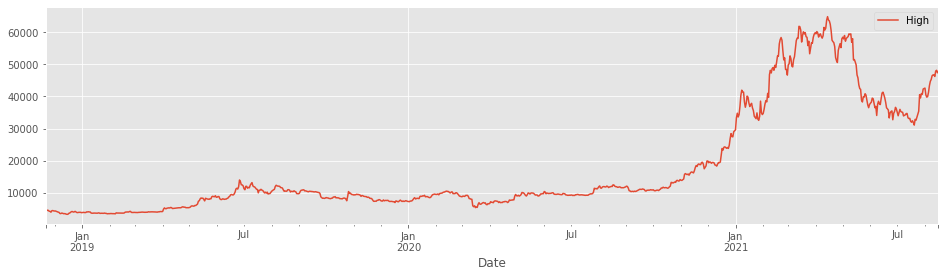

In [26]:
time_usd = pd.Series(data=btc_usd['High'].values, index=btc.index)
time_usd.plot(figsize=(16, 4), label="High", legend=True)

#### Plotting the BTC Market Volume from  2018 (Nov) to (AUG) 2021

<AxesSubplot:xlabel='Date'>

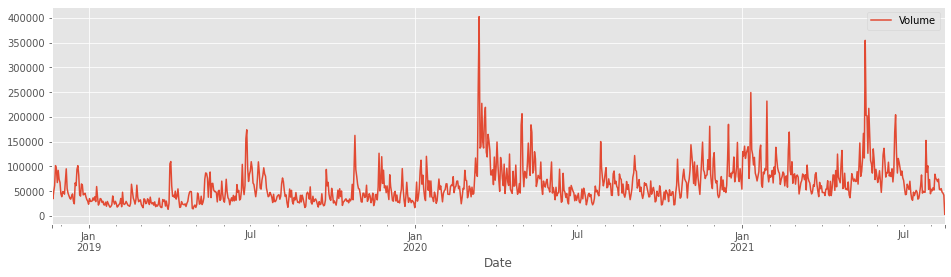

In [27]:
time_usd = pd.Series(data=btc_usd['Volume'].values, index=btc.index)
time_usd.plot(figsize=(16, 4), label="Volume", legend=True)

#### Layered Time Series -- High and Low

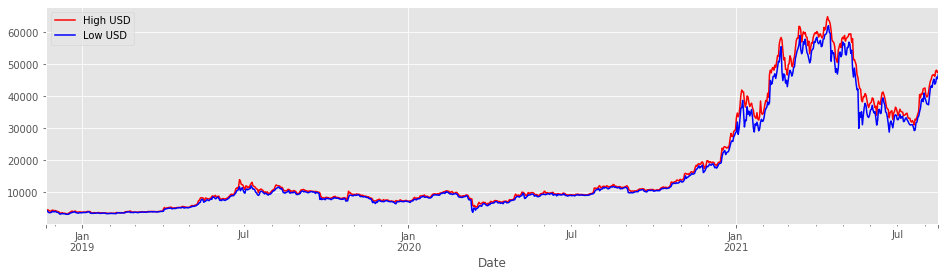

In [28]:
time_usd=pd.Series(data=btc_usd['High'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 4), label="High USD", legend=True, color='r')

time_usd = pd.Series(data=btc_usd['Low'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 4), label="Low USD", legend=True,color='b')
plt.show()

#### Layered Time Series -- High, Low and Closing BTC price

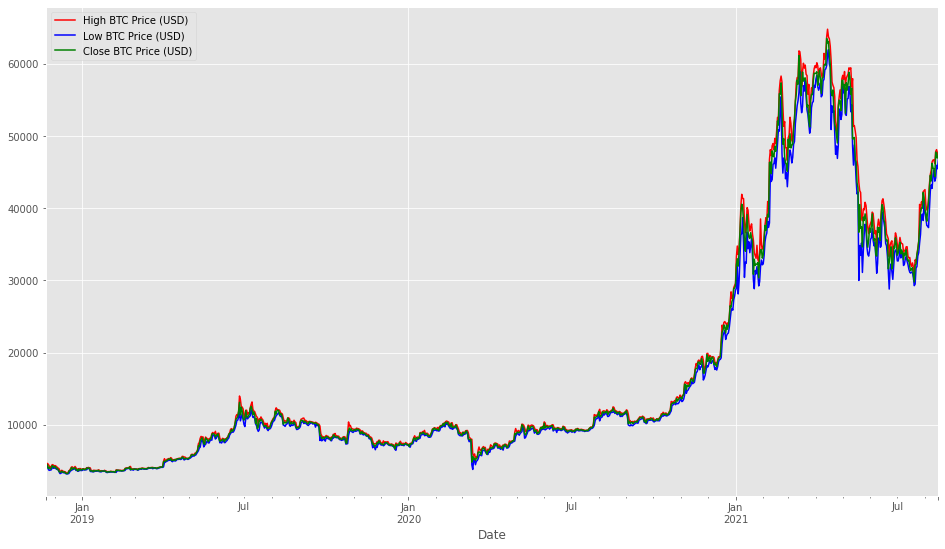

In [29]:
time_usd=pd.Series(data=btc_usd['High'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 9), label="High BTC Price (USD)", legend=True, color='r')

time_usd = pd.Series(data=btc_usd['Low'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 9), label="Low BTC Price (USD)", legend=True,color='b')

time_usd = pd.Series(data=btc_usd['Close'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 9), label="Close BTC Price (USD)", legend=True,color='g')

plt.show()

### Moving Average of the Time-series

In [30]:
def calculate_ma(df, colname, days):
    new_col_name = colname + '_ma_' + str(days)
    df[new_col_name] = df[colname].rolling(window=days, min_periods=0).mean()
    return df

#### Plot graphs of Close and Volume values for 100 days moving average, otherwise specify your own

In [38]:
def plot_moving_average( df, col1='Close', col2='Volume'):

    fig = plt.figure(figsize=(16, 9))
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5)
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, sharex=ax1)
    
    #moving average based on col1 name
    days = 100
    col3 = col1 + '_ma_' + str(days)
    
    ax1.plot(df.index, df[col1], label=col1)
    ax1.plot(df.index, df[col3], label=col3)
    ax2.bar(df.index, df[col2], label=col2)
    
    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()

In [32]:
includeCols = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in includeCols:
    # create 100 days moving average
    days = 100
    if col in includeCols:
        calculate_ma(btc_usd, col, days)
        

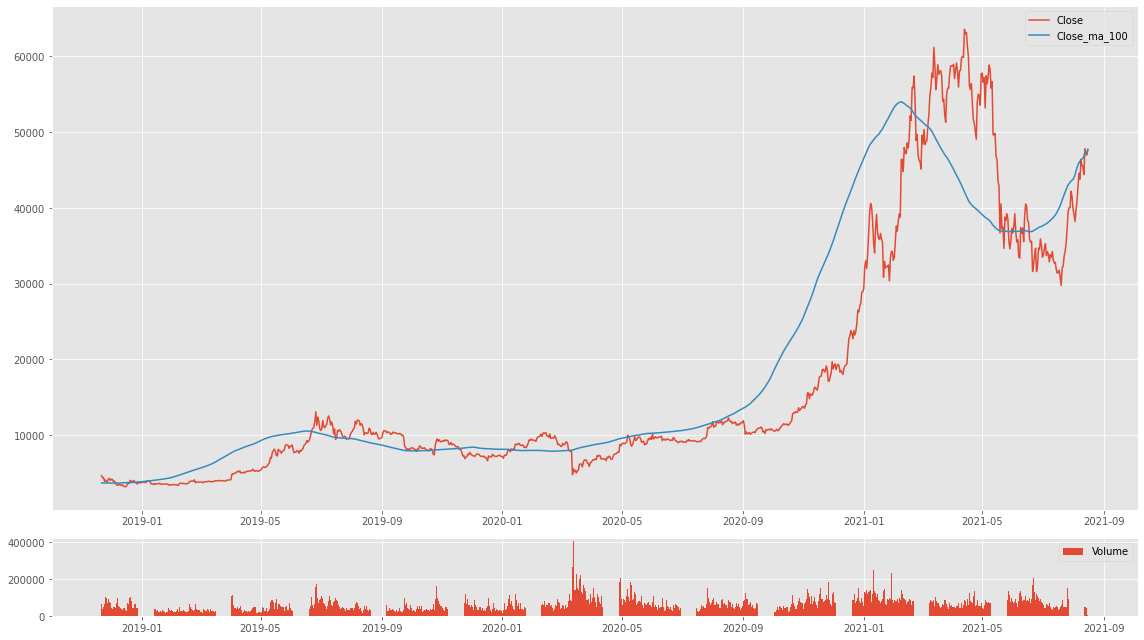

In [39]:
plot_moving_average(btc_usd)